In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

Sea Temp:

Edmunds, P. J. (2020) Seawater temperature between Cabritte Horn and White Point on the south shore of St. John, US Virgin Islands, 1996-2018. Biological and Chemical Oceanography Data Management Office (BCO-DMO). (Version 1) Version Date 2020-10-28 [if applicable, indicate subset used]. doi:10.26008/1912/bco-dmo.827812.1 [access date]

<AxesSubplot: xlabel='year'>

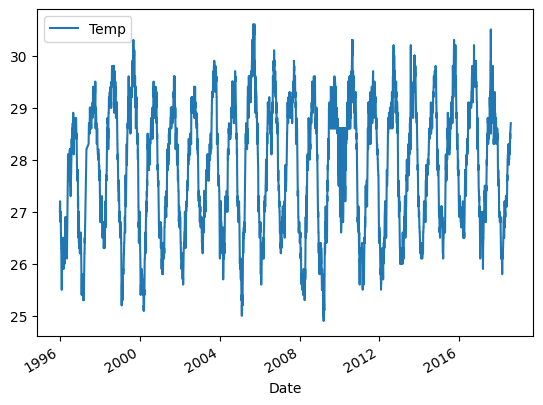

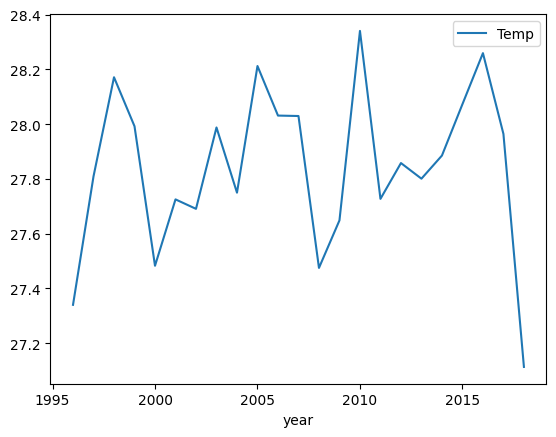

In [74]:
data = pd.read_csv("L_O_seawater_temp.csv", index_col = "Date")
data.sort_index(inplace = True)
data = data[1:]
temp_data = data[data['Temp'] != 'nd'].astype(float)
temp_data.index = pd.to_datetime(temp_data.index)
temp_data['year'] = temp_data.index.year
temp_data.plot(y = 'Temp')

year_means = temp_data.groupby(['year']).mean()
year_means.plot()

In [96]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
df.index = pd.to_datetime(df.index)
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()

z = np.diff(avg_percent_cover_allcoral_tektite)

In [105]:
comb_data = pd.concat([avg_percent_cover_allcoral_tektite,year_means],axis = 1)